In [154]:
import joblib                as jlb
import matplotlib.pyplot     as plt
import numpy                 as np
import pandas                as pd
import seaborn               as sbn

from comet_ml                import ConfusionMatrix
from sklearn                 import metrics
from sklearn.metrics         import accuracy_score, confusion_matrix
from sklearn.metrics         import auc,roc_curve
from sklearn.metrics         import precision_score, recall_score, f1_score , silhouette_score, silhouette_samples
from sklearn.pipeline        import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.naive_bayes     import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm             import SVC
from sklearn.preprocessing   import LabelEncoder

from collections          import Counter
from sklearn.cluster      import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster        import hierarchy

In [155]:
df = pd.read_excel(r'D:\Code_learning\MachineLearning\Data\Customers.xls')
df

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,Income,FamilySize
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0
...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0


In [156]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())

(10695, 9)
CustomerID          int64
Gender             object
Married            object
Age                 int64
Graduated          object
Profession         object
WorkExperience    float64
Income             object
FamilySize        float64
dtype: object
CustomerID           0
Gender               0
Married            190
Age                  0
Graduated          102
Profession         162
WorkExperience    1098
Income               0
FamilySize         448
dtype: int64
          CustomerID           Age  WorkExperience    FamilySize
count   10695.000000  10695.000000     9597.000000  10247.000000
mean   463468.088640     43.511828        2.619777      2.844052
std      2600.966411     16.774158        3.390790      1.536427
min    458982.000000     18.000000        0.000000      1.000000
25%    461220.500000     30.000000        0.000000      2.000000
50%    463451.000000     41.000000        1.000000      3.000000
75%    465733.500000     53.000000        4.000000      4.000000
m

In [157]:
#axis=1 xoa cot, axis=0 xoa hang
df = df.dropna(axis=0)
print(df.shape)

(8896, 9)


In [158]:
df_text = df.select_dtypes(include=['object'])  # Lọc cột text
df_text

,Gender,Married,Graduated,Profession,Income
0,Male,No,No,Healthcare,Low
2,Female,Yes,Yes,Engineer,Low
3,Male,Yes,Yes,Lawyer,High
5,Male,Yes,No,Artist,Average
6,Male,No,Yes,Healthcare,Low
...,...,...,...,...,...
10689,Female,No,Yes,Entertainment,Low
10690,Male,No,No,Healthcare,Low
10691,Female,No,Yes,Doctor,Low
10693,Male,Yes,Yes,Executive,High


In [159]:
for col in df_text.columns:
    print(str(col),": ","(",np.size(df_text[col].unique().tolist()),") ",df_text[col].unique().tolist())

Gender :  ( 2 )  ['Male', 'Female']
Married :  ( 2 )  ['No', 'Yes']
Graduated :  ( 2 )  ['No', 'Yes']
Profession :  ( 9 )  ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor', 'Homemaker', 'Entertainment', 'Marketing', 'Executive']
Income :  ( 3 )  ['Low', 'High', 'Average']


In [160]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df_text.columns:
    df[col] = encoder.fit_transform(df[col])  # Chuyển text thành số
    

#Dùng mapping 
# convert_gender = {'Male': 1, 'Female': 0}
# convert_married = {'Yes': 1, 'No': 0}
# convert_graduated = {'Yes': 1, 'No': 0}
# convert_profession = {'Healthcare': 0, 'Engineer' : 1, 'Lawyer' : 2, 'Artist' : 3, 'Doctor': 4, 'Homemaker' : 5, 'Entertainment' : 6, 'Marketing': 7, 'Executive': 8}
# convert_income = {'Low': 0, 'Average': 1, 'High': 2}

# df['Gender'] = df['Gender'].map(convert_gender)
# df['Married'] = df['Married'].map(convert_married)
# df['Graduated'] = df['Graduated'].map(convert_graduated)
# df['Profession'] = df['Profession'].map(convert_profession)
# df["Income"] = df["Income"].map(convert_income)

df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3080\2761569218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])  # Chuyển text thành số
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3080\2761569218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])  # Chuyển text thành số
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3080\2761569218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,Income,FamilySize
0,462809,1,0,22,0,5,1.0,2,4.0
2,466315,0,1,67,1,2,1.0,2,1.0
3,461735,1,1,67,1,7,0.0,1,2.0
5,461319,1,1,56,0,0,0.0,0,2.0
6,460156,1,0,32,1,5,1.0,2,3.0
...,...,...,...,...,...,...,...,...,...
10689,467950,0,0,35,1,3,1.0,2,2.0
10690,467954,1,0,29,0,5,9.0,2,4.0
10691,467958,0,0,35,1,1,1.0,2,1.0
10693,467961,1,1,47,1,4,1.0,1,5.0


In [161]:
df.drop(['CustomerID'], axis=1, inplace=True)
df.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3080\41571459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['CustomerID'], axis=1, inplace=True)


,Gender,Married,Age,Graduated,Profession,WorkExperience,Income,FamilySize
Gender,1.000000,0.111769,0.015013,-0.053553,0.036502,-0.056394,-0.054490,0.063290
Married,0.111769,1.000000,0.570718,0.203564,-0.130698,-0.099094,-0.629333,-0.086546
Age,0.015013,0.570718,1.000000,0.247257,0.041511,-0.188348,-0.280677,-0.282747
Graduated,-0.053553,0.203564,0.247257,1.000000,-0.310855,0.040762,-0.162921,-0.245977
Profession,0.036502,-0.130698,0.041511,-0.310855,1.000000,-0.031702,0.226425,0.103540
WorkExperience,-0.056394,-0.099094,-0.188348,0.040762,-0.031702,1.000000,0.056992,-0.070922
Income,-0.054490,-0.629333,-0.280677,-0.162921,0.226425,0.056992,1.000000,-0.109932
FamilySize,0.063290,-0.086546,-0.282747,-0.245977,0.103540,-0.070922,-0.109932,1.000000


In [162]:
model = KMeans(n_clusters=5)
model.fit(df)

KMeans(n_clusters=5)

In [141]:
## Kết quả gom cụm 
centroids       = model.cluster_centers_
df_kmean        = df.copy()
df_kmean['cluster'] = model.labels_
print(df.head(10))

print('\nKích thước các clusters:', Counter(model.labels_))
print('\nClusters lớn nhất:', Counter(model.labels_).most_common(1))

    Gender  Married  Age  Graduated  Profession  WorkExperience  Income  \
0        1        0   22          0           5             1.0       2   
2        0        1   67          1           2             1.0       2   
3        1        1   67          1           7             0.0       1   
5        1        1   56          0           0             0.0       0   
6        1        0   32          1           5             1.0       2   
7        0        0   33          1           5             1.0       2   
8        0        1   61          1           2             0.0       2   
9        0        1   55          1           0             1.0       0   
10       0        0   26          1           2             1.0       2   
11       1        0   19          0           5             4.0       2   

    FamilySize  
0          4.0  
2          1.0  
3          2.0  
5          2.0  
6          3.0  
7          3.0  
8          3.0  
9          4.0  
10         3.0  
11  

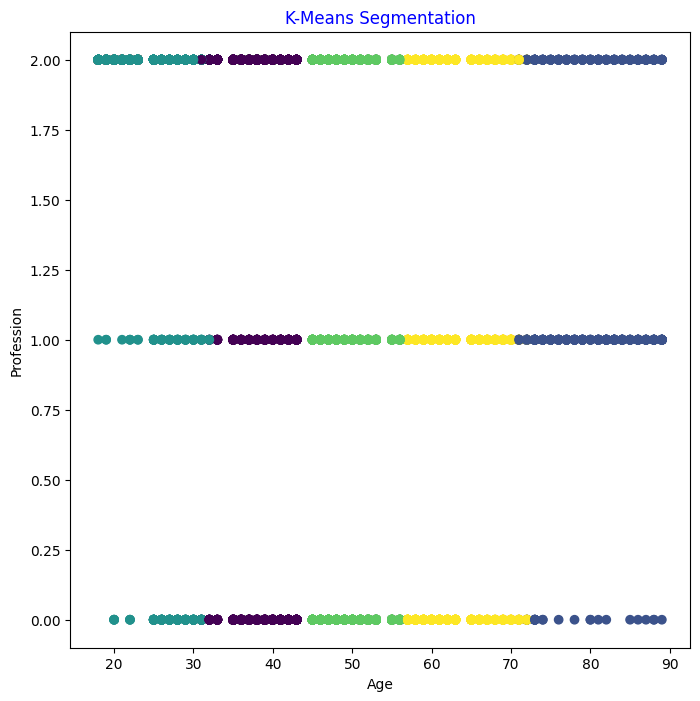

In [142]:
## Biểu diễn trực quan
plt.figure(figsize = (8, 8))
# plt.scatter(centroids[:, 0], centroids[:, 1], marker = "s", s = 50, color = 'r')
plt.scatter(df_kmean.Age, df_kmean['Income'], c = df_kmean.cluster)
plt.xlabel("Age")
plt.ylabel("Profession")
plt.title("K-Means Segmentation", color = "blue")
plt.show()

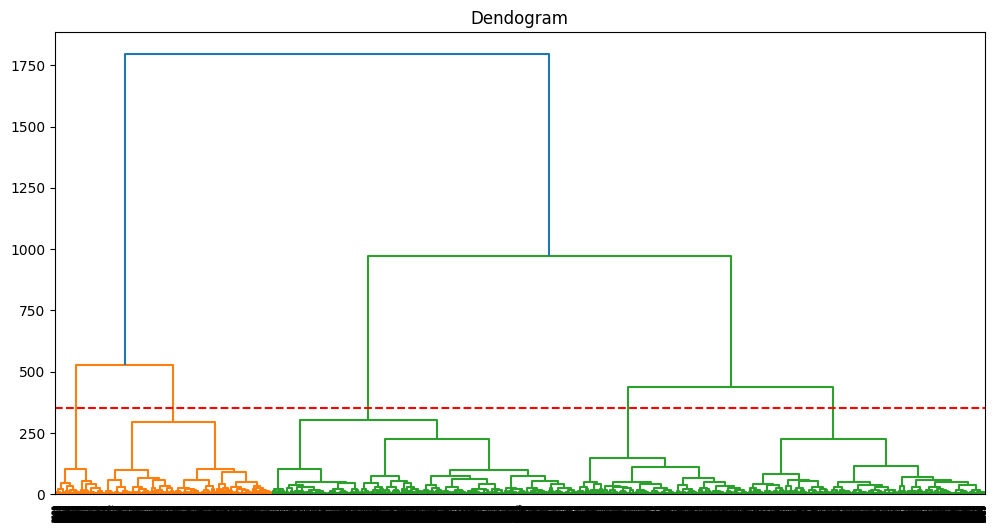

In [143]:
##------------------------------------------------------------------------------
## Xây dụng Dendrogram
##------------------------------------------------------------------------------
plt.figure(figsize = (12, 6))
plt.title("Dendogram")
dg = hierarchy.dendrogram(hierarchy.linkage(df, method = 'ward'))
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
## method = {'single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward'}

## https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist
## metric = {}

plt.axhline(y = 350, color = 'r', linestyle = '--')
plt.show()

In [164]:
## Xây dựng mô hình
k     = 5
model = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'ward')
model.fit(df)

AgglomerativeClustering(n_clusters=5)

In [145]:
## Kết quả gom cụm khách hàng (AgglomerativeClustering() không có trọng tâm 'cluster_centers_')
df_agg = df.copy()
df_agg['cluster'] = model.labels_
print(df_agg.head(10))

    Gender  Married  Age  Graduated  Profession  WorkExperience  Income  \
0        1        0   22          0           5             1.0       2   
2        0        1   67          1           2             1.0       2   
3        1        1   67          1           7             0.0       1   
5        1        1   56          0           0             0.0       0   
6        1        0   32          1           5             1.0       2   
7        0        0   33          1           5             1.0       2   
8        0        1   61          1           2             0.0       2   
9        0        1   55          1           0             1.0       0   
10       0        0   26          1           2             1.0       2   
11       1        0   19          0           5             4.0       2   

    FamilySize  cluster  
0          4.0        0  
2          1.0        1  
3          2.0        1  
5          2.0        1  
6          3.0        0  
7          3.0    

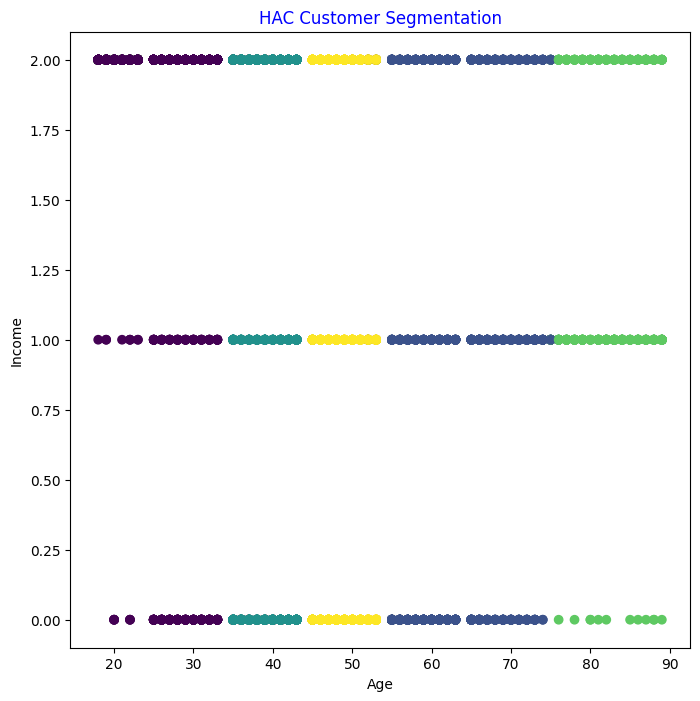

In [146]:
## Biểu diễn trực quan
plt.figure(figsize = (8, 8))
plt.scatter(df_agg.Age, df_agg['Income'], c = df_agg.cluster)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("HAC Customer Segmentation", color = "blue")
plt.show()

In [166]:
model = DBSCAN(eps = 0.5, min_samples = 5)
model.fit(df)

DBSCAN()

In [150]:
## Kết quả gom cụm DBSCAN
df_dbscan = df.copy()
df_dbscan['cluster'] = model.labels_
print(df_agg.head(10))

    Gender  Married  Age  Graduated  Profession  WorkExperience  Income  \
0        1        0   22          0           5             1.0       2   
2        0        1   67          1           2             1.0       2   
3        1        1   67          1           7             0.0       1   
5        1        1   56          0           0             0.0       0   
6        1        0   32          1           5             1.0       2   
7        0        0   33          1           5             1.0       2   
8        0        1   61          1           2             0.0       2   
9        0        1   55          1           0             1.0       0   
10       0        0   26          1           2             1.0       2   
11       1        0   19          0           5             4.0       2   

    FamilySize  cluster  
0          4.0        0  
2          1.0        1  
3          2.0        1  
5          2.0        1  
6          3.0        0  
7          3.0    

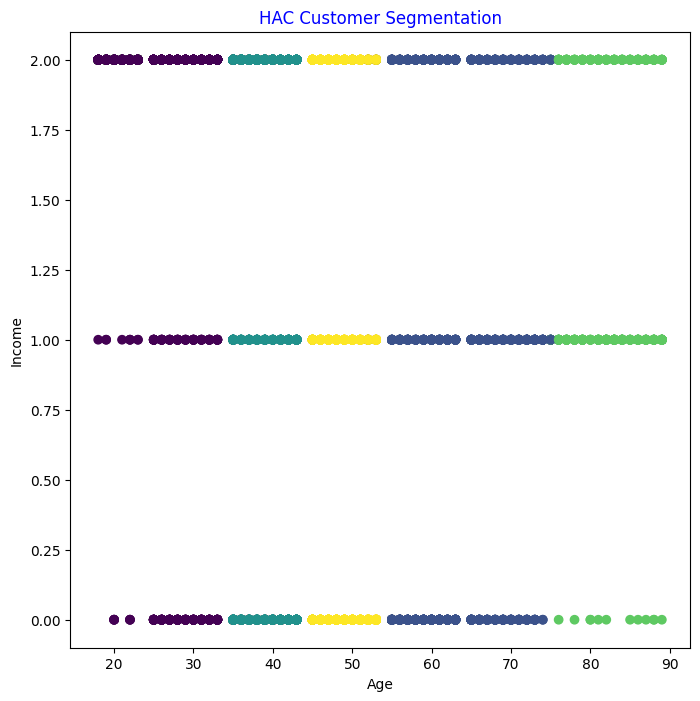

In [151]:
## Biểu diễn trực quan
plt.figure(figsize = (8, 8))
plt.scatter(df_agg.Age, df_agg['Income'], c = df_agg.cluster)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("HAC Customer Segmentation", color = "blue")
plt.show()

In [167]:
print(silhouette_score(df, model.fit_predict(df), metric = 'euclidean'))

-0.6930025191451218
